In [57]:
#libraries

import random
import matplotlib.pyplot as plt
import numpy as np

In [77]:
#Creation of the directed random regular graph according to Configuration model (Bollobas paper), with kout fixed
#Think to a different kin, kout (kin is function of kout someway)

def RRG_direct(k,N):
    bool_graph = 0
    while bool_graph == 0:
        #print('ok')
        bool_graph = 1
        buckets = [[] for i in range(N)]
        edges_out = []
        edges_in = []
        edge_list_out = [[] for i in range(N)]
        edge_list_in = [[] for i in range(N)]
        pool_out = [i for i in range(N*k)]

        i=0
        j=0
        while i<N:
            if(len(buckets[i]) != k):
                buckets[i].append(j)
                j += 1
            else:
                i += 1
        
        pool_out = [i for i in range(N*k)]
        pool_out_mod = list(pool_out)
        
        for i in range(int(N*k)): #outgoing edges
            j = int(random.uniform(0, 1)*(N*k-i))
            l = j
            while l == j:
                l = int(random.uniform(0, 1)*(N*k))
            
            edges_out.append(pool_out_mod[j])
            edges_in.append(pool_out[l])
            del pool_out_mod[j]
                
        
        for i in range(len(edges_out)): #We store the graph in two sorts of compressed-row pythonic formats (list of list)
            edge_list_out[int(edges_out[i]/k)].append(int(edges_in[i]/k))
        for i in range(len(edges_in)):
            edge_list_in[int(edges_in[i]/k)].append(int(edges_out[i]/k))
        
        #print(edge_list)

        #I check if the graph I built is good (no multiedges/no loops) for both edge_lists, 
        #but in the limit of big N and low k,
        #we could neglect this since the probability of finding such a wrong graph is .... (check paper Bollobas)

        for i in range(len(edge_list_out)):
            for j in range(len(edge_list_out[i])):
                temp = edge_list_out[i][j]
                if i == edge_list_out[i][j]: #checking for loops
                    #print('ok0')
                    bool_graph = 0
                    break
                no_element = list(edge_list_out[i])
                del no_element[j]
                for l in range(len(no_element)):
                    if no_element[l] == temp: #checking for multiedges
                        #print('ok1')
                        bool_graph = 0
                        break
                del no_element
                if bool_graph == 0:
                    break
            if bool_graph == 0:
                break
                
        if(bool_graph==0):
            #print('ok')
            del buckets, edges_out, edges_in, edge_list_out, edge_list_in, pool_out, pool_out_mod
    
    return edge_list_out, edge_list_in

In [85]:
#Computing numerically the reciprocated arcs

def r_numerical(edge_list_out, edge_list_in, k, N):
    r = 0
    for i in range(len(edge_list_out)):
        for j in range(len(edge_list_out[i])):
            if(edge_list_out[i][j] in edge_list_in[i]):
                r += 0.5
    return 2*r/(k*N)

In [89]:
#Main

def Compare_formula_vs_algo(k,N_ens):
    dim_arr = [10, 50, 100, 500, 1000, 5000]
    r_num = [[] for i in range(len(dim_arr))]
    r_num_mean = []
    r_num_err = []
    r_th = []
    for N in dim_arr:
        print(N)
        for n in range(N_ens):
            
            #Graph creation from ERG
            #edge_list = ERG(p,N)
            
            #Graph creation from RRG
            edge_list = RRG_direct(k,N)
            n+=1
            
            #Computing the number of reciprocated arcs (algorithm)
            r_num[dim_arr.index(N)].append(r_numerical(edge_list[0],edge_list[1],k,N))
        
        #Calculating the average over the ensemble
        r_num_mean.append(sum(r_num[dim_arr.index(N)])/N_ens)
        
        #Calculating the error for each value
        r_num_err.append(np.std(r_num[dim_arr.index(N)]))
        
        #Calculating the clustering coefficient for RRG (formula)
        r_th.append(k/(N-1))
        
        #Calculating the clustering coefficient for ERG (formula)
        #C_th.append(k/(N))
    
    return (r_num_mean, r_num_err, r_th)

In [90]:
r_try = Compare_formula_vs_algo(3,100)

10
50
100
500
1000
5000


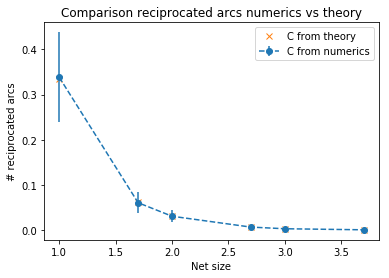

In [94]:
#Plots for random regular graphs
#Remember to specify the kout of the graph and get results for many different kout

dim_arr = [10, 50, 100, 500, 1000, 5000]
log_dim_arr = np.log10(np.asarray(dim_arr))



plt.errorbar(log_dim_arr, r_try[0], yerr=r_try[1], fmt='--o', label='C from numerics')
plt.plot(log_dim_arr, r_try[2], 'x', label='C from theory')
plt.xlabel('Net size')
plt.ylabel('# reciprocated arcs')
plt.title('Comparison reciprocated arcs numerics vs theory')
plt.legend()
plt.show()